In [45]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt 

In [46]:
df_MSFT = pd.read_csv("./dataset_MSFT_Stock/MSFT_Stock.csv", index_col=0)

In [47]:
df_MSFT.index = pd.to_datetime(df_MSFT.index)
df_MSFT.head()

,open,high,low,close,volume
2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [48]:
# examine shape of dataframe, variable types
print(df_MSFT.shape)
print(df_MSFT.dtypes)

(5000, 5)
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object


Text(0.5, 1.0, 'Features Correlation')

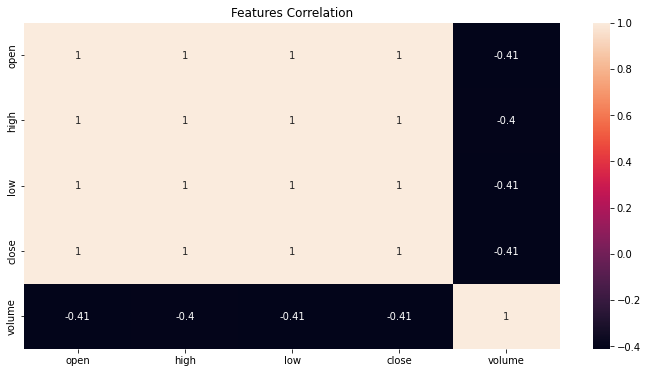

In [49]:
# plotting and displaying corrlation of features with values
plt.figure(figsize=(12,6))
sns.heatmap(
    df_MSFT.corr(), 
    annot=True,
    )
plt.title('Features Correlation')

C:\Users\mat98\AppData\Local\Temp\ipykernel_11076\3116011515.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=20)
C:\Users\mat98\AppData\Local\Temp\ipykernel_11076\3116011515.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=20)
C:\Users\mat98\AppData\Local\Temp\ipykernel_11076\3116011515.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=20)
C:\Users\mat98\AppData\Local\Temp\ipykernel_11076\3116011515.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=20)


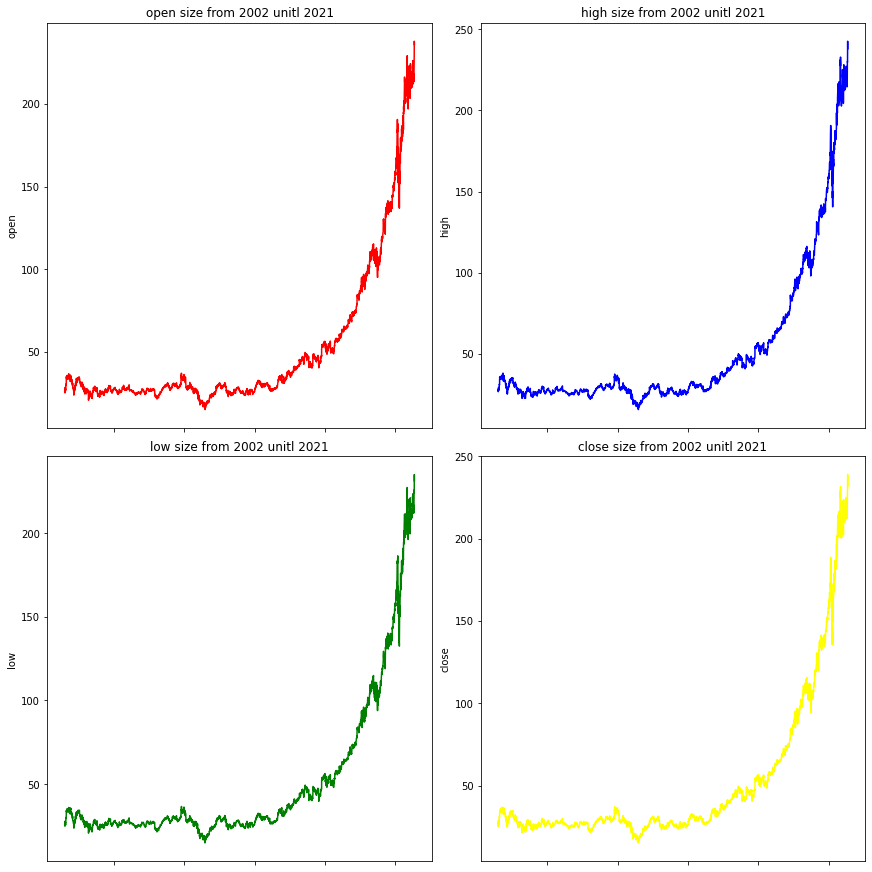

In [50]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 12), constrained_layout=True) 
ax = ax.ravel()

colors = ['red', 'blue', 'green', 'yellow']
cols = [col for col in df_MSFT.columns if col != 'volume']

for i in range(len(cols)):
    df_MSFT.iloc[:,i].plot(ax=ax[i], color=colors[i], )
    ax[i].set(ylabel=cols[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=20)
    ax[i].set_title(f'{cols[i]} size from 2002 unitl 2021');

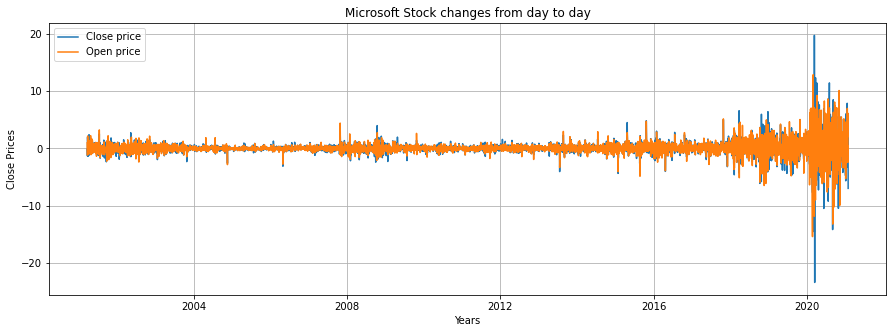

In [51]:
# the difference between day to day
#plot close price
plt.figure(figsize=(15,5))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Close Prices')
plt.plot(df_MSFT.diff()[['close','open']])
plt.title('Microsoft Stock changes from day to day')
plt.legend( ["Close price", "Open price"])
plt.show()

In [52]:
# any missing values?
df_MSFT.isnull().values.any()

False

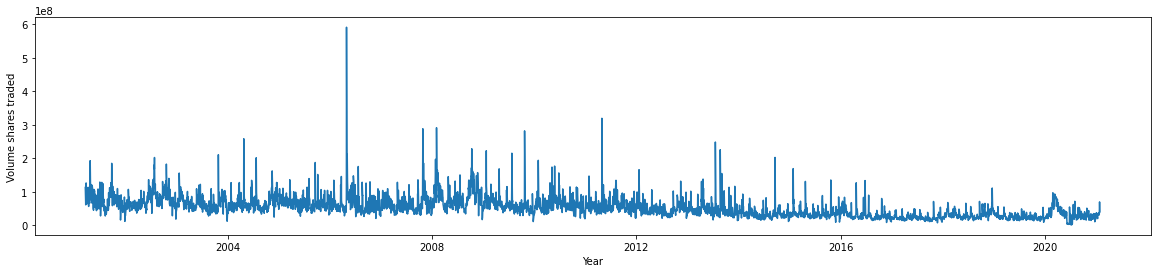

In [53]:
# plot car count over all years
plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Volume shares traded')
plt.plot(df_MSFT.index, df_MSFT['volume'])
plt.show()

<AxesSubplot:>

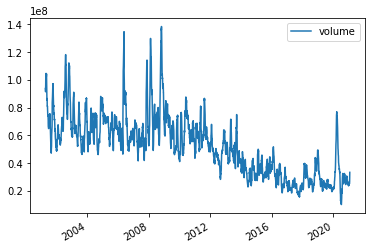

In [54]:
ts_stock=pd.DataFrame(df_MSFT['volume'])
ts_stock_ma=ts_stock.rolling(window=20).mean()
ts_stock_ma.plot()

In [55]:
ts_stock['previous day volume']=ts_stock['volume'].shift(1)
ts_stock.head()

,volume,previous day volume
2001-03-16,112848800,NaN
2001-03-19,61036400,112848800.0
2001-03-20,91822800,61036400.0
2001-03-21,124988600,91822800.0
2001-03-22,126363200,124988600.0


In [56]:
ts_stock['diff_series']=ts_stock['volume']-ts_stock['previous day volume']
ts_stock_1=ts_stock.dropna()
ts_stock_1

,volume,previous day volume,diff_series
2001-03-19,61036400,112848800.0,-51812400.0
2001-03-20,91822800,61036400.0,30786400.0
2001-03-21,124988600,91822800.0,33165800.0
2001-03-22,126363200,124988600.0,1374600.0
2001-03-23,99519600,126363200.0,-26843600.0
...,...,...,...
2021-01-25,33152095,30124900.0,3027195.0
2021-01-26,48699200,33152095.0,15547105.0
2021-01-27,69757500,48699200.0,21058300.0
2021-01-28,48990000,69757500.0,-20767500.0


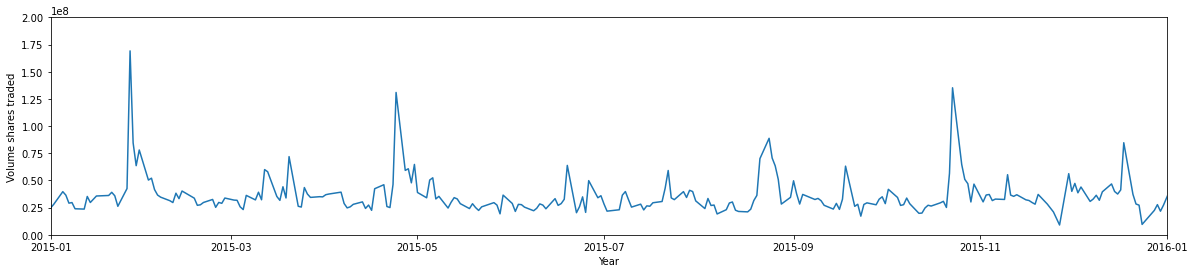

In [59]:
# volume for 2015
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2016,1,1)

plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_ylim(0,200000000)
ax.set_xlabel('Year')
ax.set_ylabel('Volume shares traded')
plt.plot(ts_stock_1['volume'])

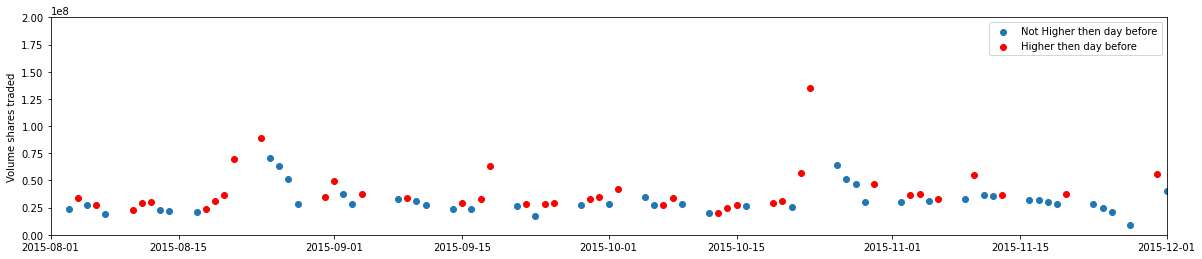

In [60]:
# let's take a closer look: autumn 2015
start = datetime.datetime(2015,8,1)
end = datetime.datetime(2015,12,1)

higher_data = ts_stock_1.loc[(ts_stock_1['diff_series'] > 0)]
not_higher_data = ts_stock_1.loc[(ts_stock_1['diff_series'] <= 0)]

plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_ylim(0, 200000000)
ax.set_ylabel('Volume shares traded')
plt.scatter(not_higher_data.index, not_higher_data['volume'])  
plt.scatter(higher_data.index, higher_data['volume'], color='r');     
ax.legend(['Not Higher then day before', 'Higher then day before'])

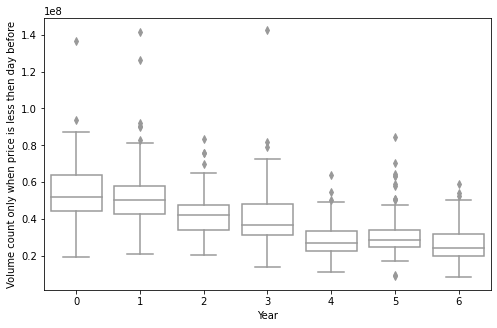

In [61]:
# plot outliers by year
data_boxplot = []
for year in range(2010, 2017):
    data_boxplot.append(not_higher_data.loc[(not_higher_data.index.year == year)]['volume'])
    
import seaborn as sns
plt.figure(figsize=(8,5))
ax = plt.gca()
sns.boxplot(data=data_boxplot, color='w', whis=1.5)
ax.set_xlabel('Year')
ax.set_ylabel('Volume count only when price is less then day before');

In [62]:
# Outlier analysis: se conserviamo tutti i dati (anche quelli dei giorni nuvolosi), questo produrrà un IQR fuorviante, molto più grande di quello reale. Potremmo togliere tutti i dati dei giorni nuvolosi.

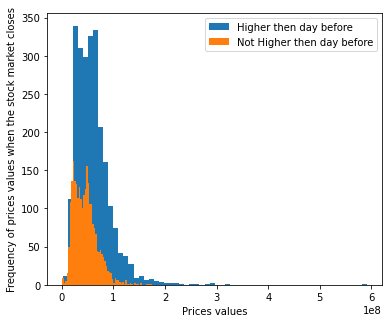

In [63]:
# frequency of Weather Indicator
plt.figure(figsize=(6,5))
ax = plt.gca()
#ax.set_xlim(-4, 5)
plt.hist(higher_data['volume'], bins=60)
plt.hist(not_higher_data['volume'], bins=60)
ax.set_ylabel('Frequency of prices values when the stock market closes')
ax.set_xlabel('Prices values')
ax.legend(['Higher then day before', 'Not Higher then day before']);

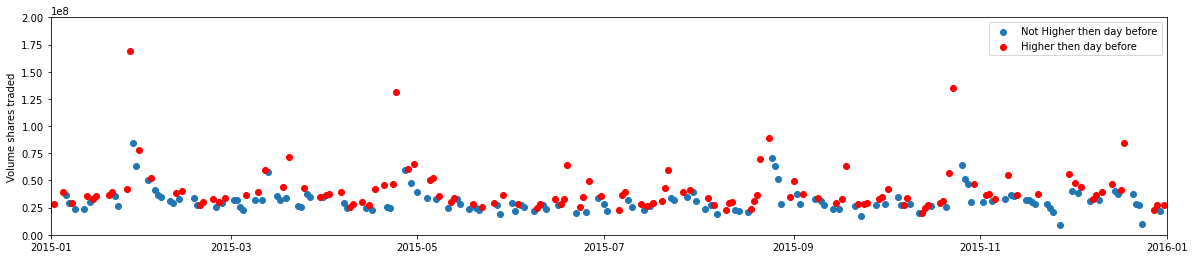

In [64]:
# seasonal trends for weather
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2016,1,1)

plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_ylim(0, 200000000)

ax.set_ylabel('Volume shares traded')
plt.scatter(not_higher_data.index, not_higher_data['volume'])  
plt.scatter(higher_data.index, higher_data['volume'], color='r');     
ax.legend(['Not Higher then day before', 'Higher then day before'])

In [65]:
#Forecasting

#Stationary
def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

In [66]:
test_stationarity(not_higher_data['volume'])

Test Statistic            -4.974197
p-value                    0.000025
Lags                      13.000000
Observations            2544.000000
Critical Value (1%)       -3.432923
Critical Value (5%)       -2.862677
Critical Value (10%)      -2.567375
dtype: float64


In [67]:
# first difference
not_higher_data['diff'] = not_higher_data['volume'] - not_higher_data['volume'].shift(1)  
test_stationarity(not_higher_data['volume'].dropna(inplace=False))

#TODO: address warning 

C:\Users\mat98\AppData\Local\Temp\ipykernel_11076\394551481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_higher_data['diff'] = not_higher_data['volume'] - not_higher_data['volume'].shift(1)


Test Statistic            -4.974197
p-value                    0.000025
Lags                      13.000000
Observations            2544.000000
Critical Value (1%)       -3.432923
Critical Value (5%)       -2.862677
Critical Value (10%)      -2.567375
dtype: float64


c:\Users\mat98\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


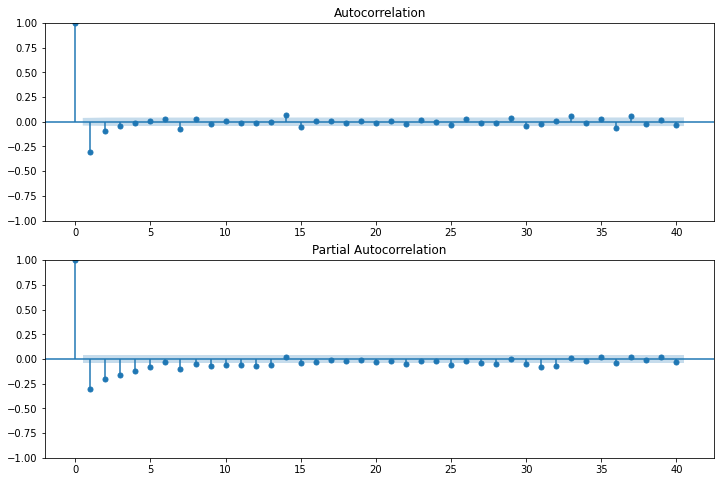

In [68]:
# ACF, PACF graphs to help determine order of ARIMA model, again statsmodel has these handy functions built-in
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(not_higher_data['diff'][1:], lags=40, ax=ax1)   # first value of diff is NaN
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(not_higher_data['diff'][1:], lags=40, ax=ax2)

c:\Users\mat98\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mat98\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mat98\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                 2558
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -45747.315
Date:                Fri, 30 Dec 2022   AIC                          91500.630
Time:                        17:58:36   BIC                          91518.171
Sample:                             0   HQIC                         91506.991
                               - 2558                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.567e+07   2.57e-11   1.78e+18      0.000    4.57e+07    4.57e+07
ar.L1          0.7884      0.010     81.485      0.000       0.769       0.807
sigma2      2.001e+14    1.2e-18   1.67e+32      0.0

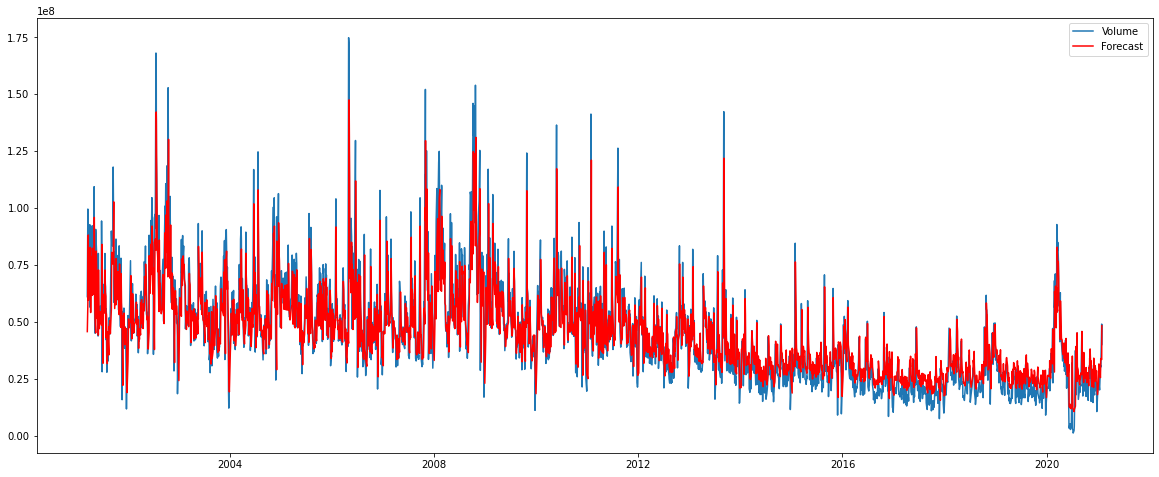

In [69]:
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(not_higher_data['volume'], order=(1,0,0)) 
ax = plt.gca()
results = model.fit() 
plt.plot(not_higher_data['volume'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Volume', 'Forecast'])

print(results.summary())

c:\Users\mat98\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mat98\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mat98\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 volume   No. Observations:                 2558
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -45642.081
Date:                Fri, 30 Dec 2022   AIC                          91292.162
Time:                        17:58:37   BIC                          91315.550
Sample:                             0   HQIC                         91300.643
                               - 2558                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.567e+07   1.87e-11   2.44e+18      0.000    4.57e+07    4.57e+07
ar.L1          0.9346      0.007    129.389      0.000       0.920       0.949
ma.L1         -0.4481      0.015    -30.409      0.000      -0.477      -0.419
sigma2      1.865e+14   2.26e-18   8.25e+31      0.000    1.87e+14    1.87e+14
===================================================================================
Ljung-Box (L1) (Q):                   9.36   Jarque-Bera (JB):             10828.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             1.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.79e+47. Standard errors may be unstable.
"""

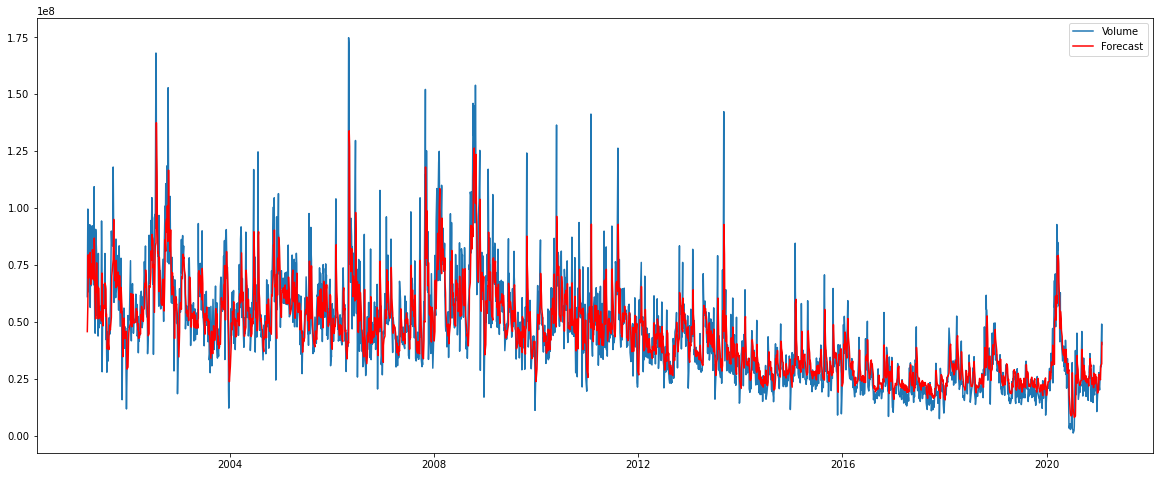

In [70]:
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(not_higher_data['volume'], order=(1,0,1)) 
ax = plt.gca()
results = model.fit() 
plt.plot(not_higher_data['volume'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Volume', 'Forecast'])

results.summary()

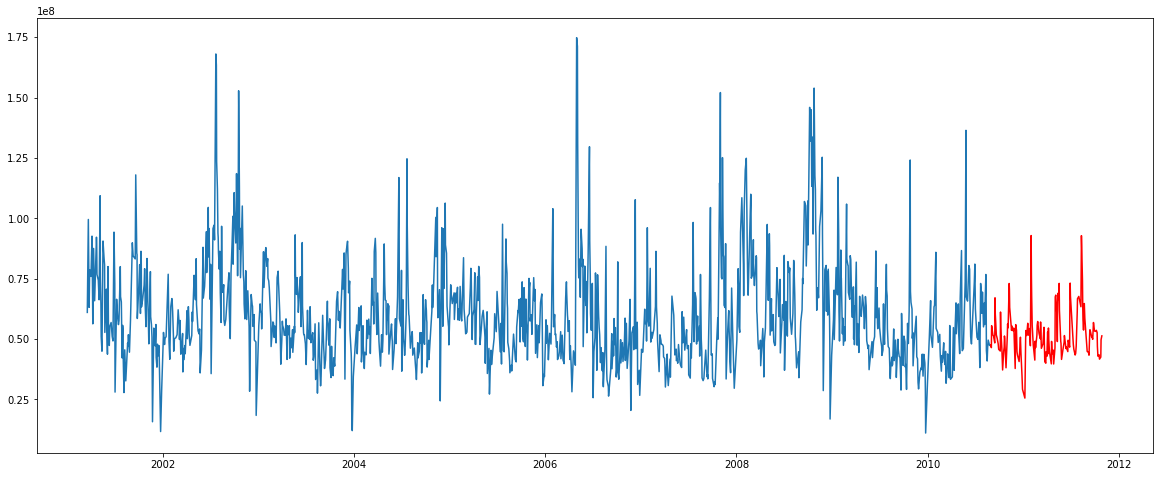

In [71]:
# forecast quick and dirty
# TODO: clean this up
fig = plt.figure(figsize=(20,8))
num_points = len(not_higher_data['volume'])
x = results.predict(start=(1200), end=(1352), dynamic=False)

plt.plot(not_higher_data['volume'][:1200])
plt.plot(x, color='r')

L'ARIMA(1,0,0) tende a catturare la media della tendenza generale, che è inferiore a quella degli anni di maggior numero di auto e superiore a quella degli anni di minor numero di auto. L'ARIMA(1,0,1) va meglio con il trend generale, ma non lo fa così bene con la variabilità e il rumore.

Spunti aggiuntivi:

Le tendenze degli anni passati (2015-2016) sono più rilevanti rispetto a quelle dei primi anni (2010-2012). Si potrebbe cercare di adattare il modello ARIMA ai soli dati degli ultimi anni per le previsioni del prossimo anno o due.
Si potrebbe analizzare più a fondo la caratteristica meteorologica nel caso in cui ci sia una qualche correlazione tra essa e il conteggio delle auto.
Sarebbe interessante vedere se i dati mancanti dei giorni nuvolosi possono essere riempiti in qualche modo.
E' possibile che con alcune caratteristiche come il tempo, il giorno della settimana e l'anno, un algoritmo più sofisticato potrebbe essere addestrato per prevedere meglio il conteggio delle auto.
Infine, sarebbe bene aggiungere più contesto di business. Ad esempio, c'è qualche indicazione che la tendenza al ribasso dal 2013 in poi continuerà? È stato costruito un altro Wal-mart a 10 miglia di distanza nel 2013 per competere con questo? Forse è stato costruito un centro commerciale nella parte nord della città e i prezzi delle case hanno iniziato a scendere quando i proprietari di case hanno iniziato a trasferirsi nella parte nord della città?